# Business Case Studies of Restaurant's Reviews

#### In this dataset we will take look on restaruant reviews and we will see how customers gave reviews. Bascially it is classification problem.

# Import Libraries

In [1]:
import pandas
import numpy
import keras
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.shape

(1000, 2)

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# EDA(Exploratory Data Analysis)

## Data Visualization

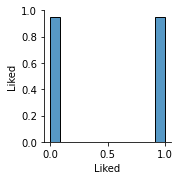

In [9]:
sns.pairplot(df)

<AxesSubplot:>

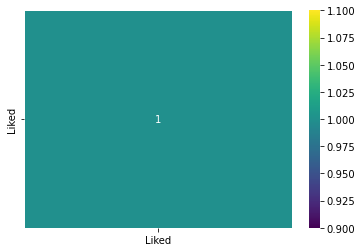

In [10]:
sns.heatmap(df.corr(),cmap = 'viridis',annot = True, linewidths=1)

<AxesSubplot:xlabel='Liked', ylabel='Density'>

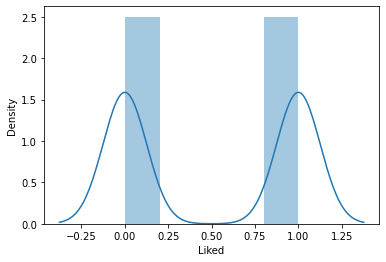

In [11]:
sns.distplot(df['Liked'])

<AxesSubplot:xlabel='Liked', ylabel='count'>

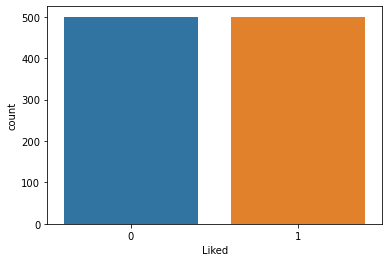

In [12]:
sns.countplot(x = 'Liked', data = df)

<AxesSubplot:>

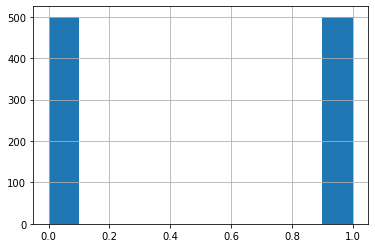

In [13]:
df['Liked'].hist()

## Setting Parameters

In [14]:
vocab_size = 500
embadding_size = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
training_size = 900

## Seperating data column to Sentences and Labels

In [15]:
sentences = df['Review'].tolist()
labels = df['Liked'].tolist()

# Splitting Dataset into Training Set and Testing Set

In [16]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Setting Tokenizer and Padding data

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Coverting data into Arrays

In [18]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Model Building

## CNN Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAvgPool1D, Dense, Embedding

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embadding_size, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Model Summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


## Training Model

In [22]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
29/29 - 1s - loss: 0.6936 - accuracy: 0.4767 - val_loss: 0.7114 - val_accuracy: 0.0400 - 621ms/epoch - 21ms/step
Epoch 2/50
29/29 - 0s - loss: 0.6899 - accuracy: 0.5511 - val_loss: 0.7388 - val_accuracy: 0.0400 - 38ms/epoch - 1ms/step
Epoch 3/50
29/29 - 0s - loss: 0.6881 - accuracy: 0.5511 - val_loss: 0.7637 - val_accuracy: 0.0400 - 37ms/epoch - 1ms/step
Epoch 4/50
29/29 - 0s - loss: 0.6867 - accuracy: 0.5511 - val_loss: 0.7729 - val_accuracy: 0.0400 - 37ms/epoch - 1ms/step
Epoch 5/50
29/29 - 0s - loss: 0.6861 - accuracy: 0.5511 - val_loss: 0.7813 - val_accuracy: 0.0400 - 39ms/epoch - 1ms/step
Epoch 6/50
29/29 - 0s - loss: 0.6847 - accuracy: 0.5511 - val_loss: 0.7896 - val_accuracy: 0.0400 - 37ms/epoch - 1ms/step
Epoch 7/50
29/29 - 0s - loss: 0.6832 - accuracy: 0.5511 - val_loss: 0.7956 - val_accuracy: 0.0400 - 38ms/epoch - 1ms/step
Epoch 8/50
29/29 - 0s - loss: 0.6813 - accuracy: 0.5511 - val_loss: 0.7885 - val_accuracy: 0.0400 - 39ms/epoch - 1ms/step
Epoch 9/50
29/29 - 0s 

In [23]:
model.history.history

{'loss': [0.6936021447181702,
  0.6899377703666687,
  0.6881188750267029,
  0.6867472529411316,
  0.6861035823822021,
  0.6847220659255981,
  0.6831665635108948,
  0.6812597513198853,
  0.6795569062232971,
  0.6737547516822815,
  0.6685099005699158,
  0.6602420806884766,
  0.6497798562049866,
  0.6385840773582458,
  0.6256183385848999,
  0.6098014116287231,
  0.5942004919052124,
  0.5771618485450745,
  0.5595621466636658,
  0.539669930934906,
  0.5198922753334045,
  0.4989621937274933,
  0.48083990812301636,
  0.46459901332855225,
  0.4443642497062683,
  0.43058016896247864,
  0.4147401452064514,
  0.39686888456344604,
  0.3836371898651123,
  0.37093451619148254,
  0.3619123101234436,
  0.35335201025009155,
  0.3335130512714386,
  0.3226288855075836,
  0.31326693296432495,
  0.3033615052700043,
  0.2945007383823395,
  0.2864336371421814,
  0.2784290611743927,
  0.2718004286289215,
  0.2658877968788147,
  0.25979486107826233,
  0.2504241168498993,
  0.2463499754667282,
  0.2421683520078

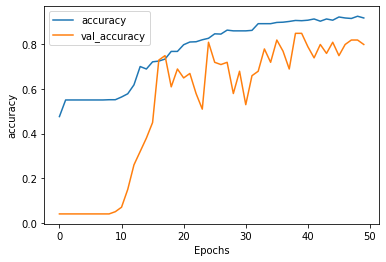

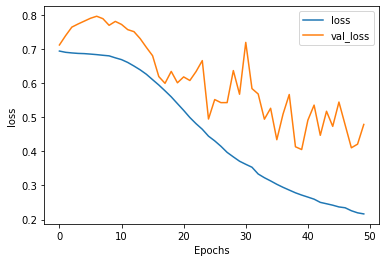

In [26]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Decoding sentences

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

wow loved this place ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Wow... Loved this place.
1


## Predictions on Testing Data

In [28]:
for n in range(10):
    print(testing_sentences[n],': ',testing_labels[n])

Spend your money elsewhere. :  0
Their regular toasted bread was equally satisfying with the occasional pats of butter... Mmmm...! :  1
The Buffet at Bellagio was far from what I anticipated. :  0
And the drinks are WEAK, people! :  0
-My order was not correct. :  0
Also, I feel like the chips are bought, not made in house. :  0
After the disappointing dinner we went elsewhere for dessert. :  0
The chips and sals a here is amazing!!!!!!!!!!!!!!!!!!! :  1
We won't be returning. :  0
This is my new fav Vegas buffet spot. :  1


### Getting Predictions with Randomly Created Reviews

In [29]:
sentence = ["Awesome Pizza", "I will come here everytime!!!", "Dont come here ever, Worst Food"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.9443935 ]
 [0.7852771 ]
 [0.08185986]]


# Great Work!